In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
import seaborn as sns
from datetime import datetime, date

import importlib
import Projet5_utils as utils
importlib.reload(utils)

PATH = "E:/OpenClassrooms/Projet5/Datasets"

# Data transformation

In [2]:
df = pd.read_csv(os.path.join(PATH, "df_by_client.csv"))

In [3]:
df.isnull().sum()

number_of_orders                           0
days_since_most_recent_order               0
average_review_score                     603
average_price                              0
number_of_items                            0
Cat_Other                                  0
Cat_alimentos                              0
Cat_automotivo                             0
Cat_bebes                                  0
Cat_beleza_saude                           0
Cat_brinquedos                             0
Cat_cama_mesa_banho                        0
Cat_casa_construcao                        0
Cat_consoles_games                         0
Cat_construcao_ferramentas_construcao      0
Cat_cool_stuff                             0
Cat_eletrodomesticos                       0
Cat_eletronicos                            0
Cat_eletroportateis                        0
Cat_esporte_lazer                          0
Cat_fashion_bolsas_e_acessorios            0
Cat_ferramentas_jardim                     0
Cat_inform

## Categorical features
#### Scaling

In [4]:
# list of continuous variables
list_cont = [
    'days_since_most_recent_order',
    'number_of_orders',
    'average_review_score',
    'average_price',
    'number_of_items'
]

# list of categorical variables
list_cat = [i for i in df.columns.tolist() if i not in list_cont]

In [5]:
df_cat = df[list_cat].values

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

std_cat = StandardScaler(with_mean=False)
df_cat_scaled = pd.DataFrame(std_cat.fit_transform(df_cat))
df_cat_scaled.columns = list_cat

## Continuous variables

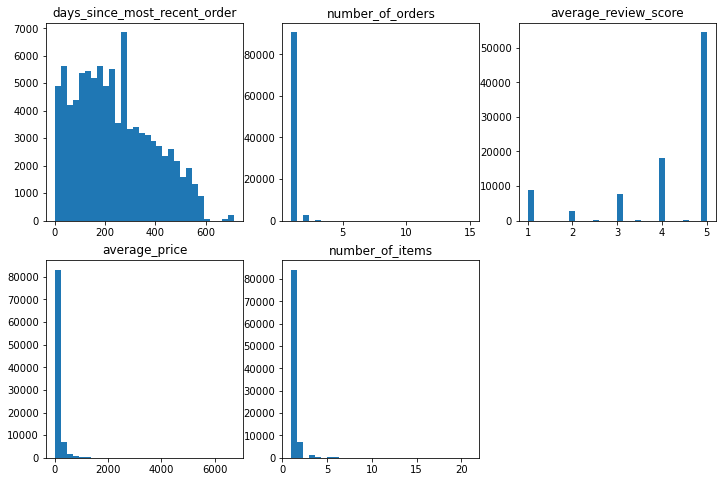

In [7]:
# distributions before transformation
fig = plt.figure(figsize=(12, 8))
for i in range(len(list_cont)):
    ax = fig.add_subplot(2, 3, (i+1))
    h = ax.hist(df[list_cont[i]], 30)
    ax.set_title(list_cont[i])
    
plt.show()

In [8]:
df_cont = df[list_cont].values

In [9]:
imputer_cont = SimpleImputer(missing_values=np.nan, strategy='mean') # imputer
std_cont = StandardScaler() # scaler

imputer_cont.fit(df_cont)
df_cont = imputer_cont.transform(df_cont)
df_cont_scaled = pd.DataFrame(std_cont.fit_transform(df_cont))
df_cont_scaled.columns = list_cont

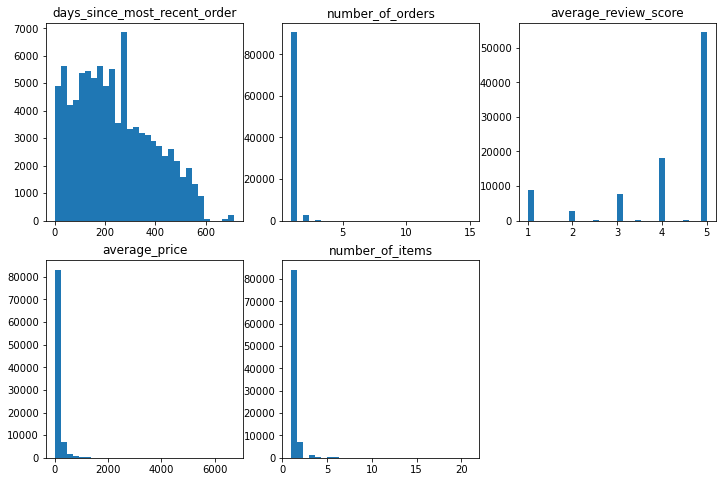

In [10]:
# distributions after transformations
fig = plt.figure(figsize=(12, 8))
for i in range(len(list_cont)):
    ax = fig.add_subplot(2, 3, (i+1))
    h = ax.hist(df[list_cont[i]], 30)
    ax.set_title(list_cont[i])
    
plt.show()

## Aggregate continuous and categorical variables in 1 df

In [11]:
df = pd.concat([df_cont_scaled, df_cat_scaled], axis=1)

In [12]:
df.isnull().sum()

days_since_most_recent_order             0
number_of_orders                         0
average_review_score                     0
average_price                            0
number_of_items                          0
Cat_Other                                0
Cat_alimentos                            0
Cat_automotivo                           0
Cat_bebes                                0
Cat_beleza_saude                         0
Cat_brinquedos                           0
Cat_cama_mesa_banho                      0
Cat_casa_construcao                      0
Cat_consoles_games                       0
Cat_construcao_ferramentas_construcao    0
Cat_cool_stuff                           0
Cat_eletrodomesticos                     0
Cat_eletronicos                          0
Cat_eletroportateis                      0
Cat_esporte_lazer                        0
Cat_fashion_bolsas_e_acessorios          0
Cat_ferramentas_jardim                   0
Cat_informatica_acessorios               0
Cat_instrum

In [13]:
df.to_csv(os.path.join(PATH, "df_transformed.csv"), index=False)

# Modelisation
#### We will now apply different clustering algorithms (K-means and DBSCAN) on different subsets of the data set and try to interpret the clusters found by these algorithms. We will not try hierarchical algorithms due to the large number of individuals as it would take too long to compute. A solution would be to apply such algorithms to a sub-sample of individuals, and generalize to the others, however there is no prediction method available to do so.

# RFM

In [14]:
PATH = "E:/OpenClassrooms/Projet5/Datasets"
df = pd.read_csv(os.path.join(PATH, "df_transformed.csv"))

In [15]:
# RFM variables
rfm = [
    'days_since_most_recent_order',
    'number_of_orders',
    'average_price'
]

X_rfm = df[rfm].values

## K-means
### Silhouette score vs number of Clusters

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_range = np.arange(2, 13, 1)
#print(k_range)
sil_scores = []
for n in k_range:
    print(n)
    clusterer = KMeans(n_clusters=n, random_state=1)
    cluster_kmeans = clusterer.fit_predict(X_rfm)
    
    silhouette = silhouette_score(X_rfm, cluster_kmeans)
    sil_scores.append(silhouette)

2
3
4
5
6
7
8
9
10
11
12


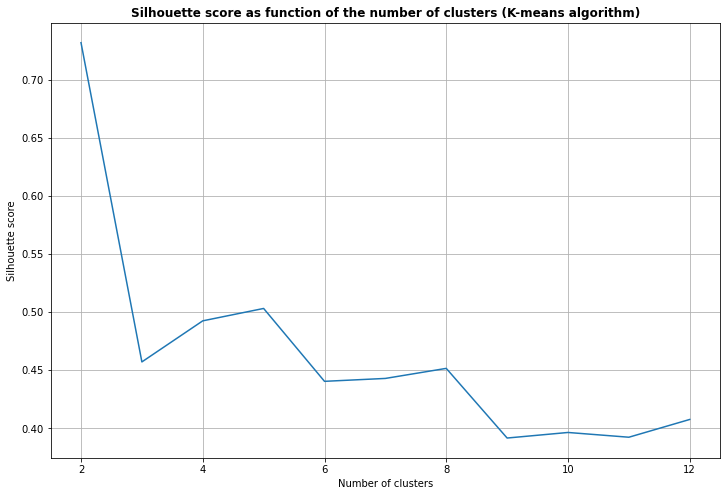

In [17]:
fig = plt.figure(figsize=(12, 8))
plt.plot(k_range, sil_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

plt.title('Silhouette score as function of the number of clusters (K-means algorithm)', fontsize=12, fontweight='semibold')
plt.grid()
plt.show()

### Plot clusters (2 and 5)

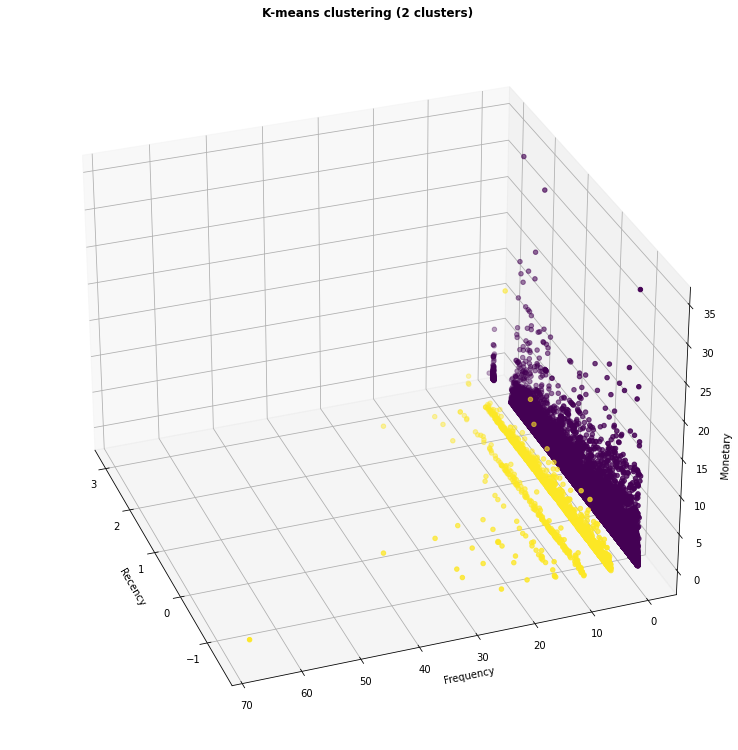

In [18]:
from mpl_toolkits.mplot3d import Axes3D

clusterer = KMeans(n_clusters=2, random_state=1)
cluster_kmeans2 = clusterer.fit_predict(X_rfm)

fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
ax.scatter(X_rfm[:, 0], X_rfm[:, 1], X_rfm[:, 2], c=cluster_kmeans2)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('K-means clustering (2 clusters)', fontsize=12, fontweight='semibold')
ax.view_init(azim=160)
plt.show()

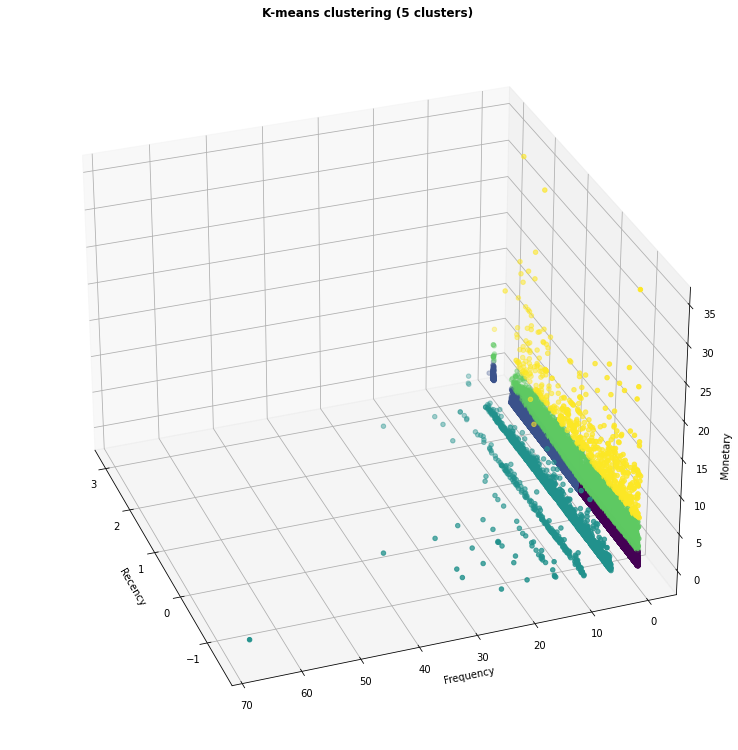

In [19]:
from mpl_toolkits.mplot3d import Axes3D

clusterer = KMeans(n_clusters=5, random_state=1)
cluster_kmeans5 = clusterer.fit_predict(X_rfm)

fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
ax.scatter(X_rfm[:, 0], X_rfm[:, 1], X_rfm[:, 2], c=cluster_kmeans5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('K-means clustering (5 clusters)', fontsize=12, fontweight='semibold')
ax.view_init(azim=160)
plt.show()

### Interpretation (5 clusters)

In [20]:
df_init = pd.read_csv(os.path.join(PATH, "df_by_client.csv"))
df_init['cluster_label_kmeans_rfm'] = cluster_kmeans5

E:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:380: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(


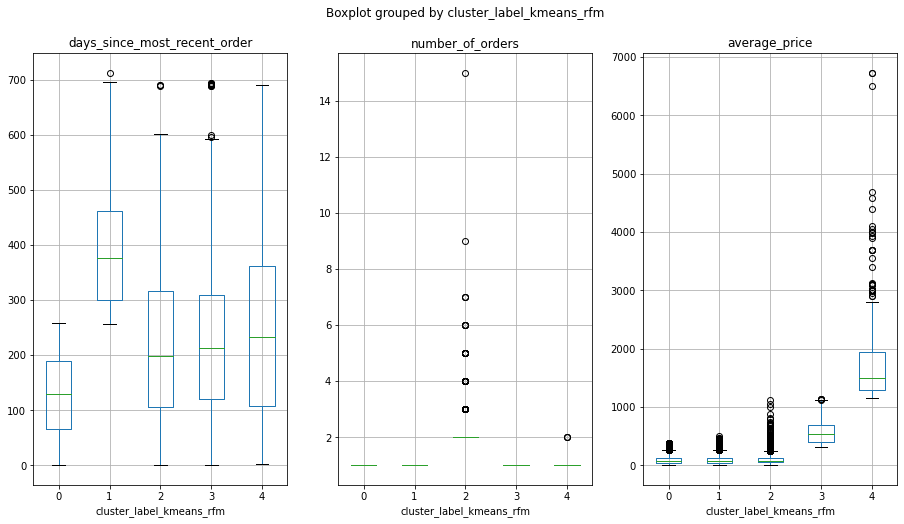

In [21]:
list_box = [
    'days_since_most_recent_order',
    'number_of_orders',
    'average_price'
]

fig, ax = plt.subplots(1, 3, figsize=(15, 8), sharey=False)

df_init.boxplot(list_box, 'cluster_label_kmeans_rfm', ax)

plt.show()

## DBSCAN

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

clustering = DBSCAN(eps=.5, min_samples=100)
clustering.fit_predict(X_rfm)
cluster_dbscan = clustering.fit_predict(X_rfm)

silhouette = silhouette_score(X_rfm, cluster_dbscan)

print(silhouette)

0.47397153317195245


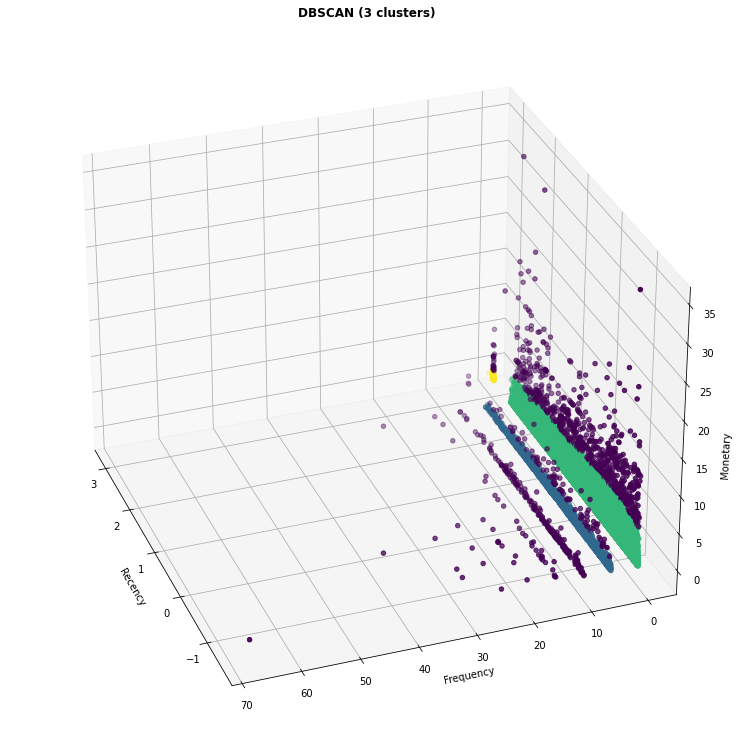

In [23]:
n_clust = len(np.unique(cluster_dbscan)) - 1 if -1 in np.unique(cluster_dbscan) else len(np.unique(cluster_dbscan))

fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
ax.scatter(X_rfm[:, 0], X_rfm[:, 1], X_rfm[:, 2], c=cluster_dbscan)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('DBSCAN (%i clusters)' %n_clust, fontsize=12, fontweight='semibold')
ax.view_init(azim=160)

plt.show()

In [24]:
np.unique(cluster_dbscan, return_counts=True)

(array([-1,  0,  1,  2], dtype=int64),
 array([ 1108,  2475, 89556,   219], dtype=int64))

### Interpretation
#### The clusters are all very similar, therefore hard to interpret

E:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:380: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(


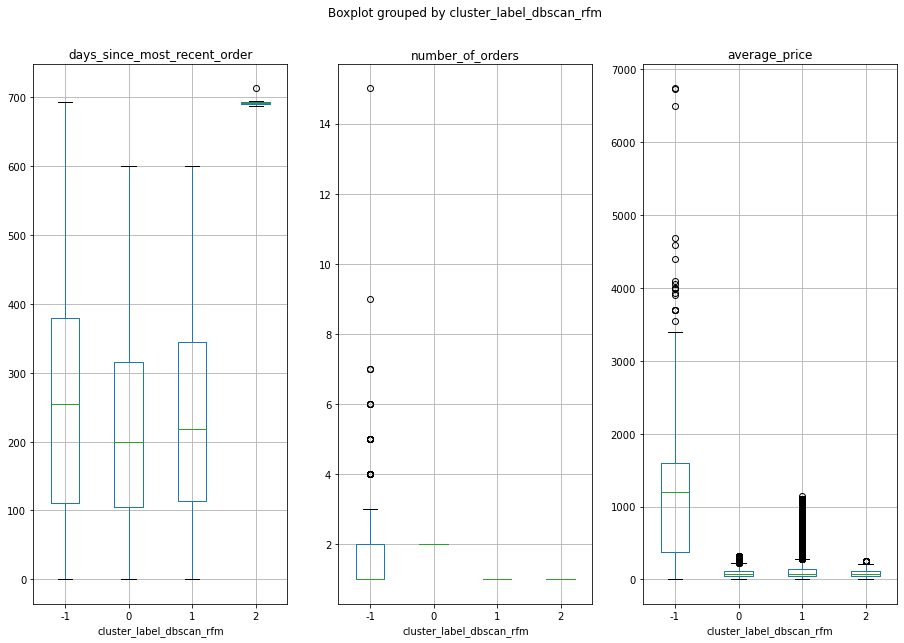

In [25]:
df_init['cluster_label_dbscan_rfm'] = cluster_dbscan

fig, ax = plt.subplots(1, 3, figsize=(15, 10), sharey=False)

df_init.boxplot(list_box, 'cluster_label_dbscan_rfm', ax)

plt.show()

# RFM + Review score + average number of items per order

In [26]:
rfm_plus = [
    'days_since_most_recent_order',
    'number_of_orders',
    'average_price',
    'average_review_score',
    'number_of_items'
]

X_rfm_plus = df[rfm_plus].values

## K-means without dimensionality reduction

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_range = np.arange(2, 13, 1)
#print(k_range)
sil_scores = []
for n in k_range:
    print(n)
    clusterer = KMeans(n_clusters=n, random_state=1)
    cluster_kmeans = clusterer.fit_predict(X_rfm_plus)
    
    silhouette = silhouette_score(X_rfm_plus, cluster_kmeans)
    sil_scores.append(silhouette)

2
3
4
5
6
7
8
9
10
11
12


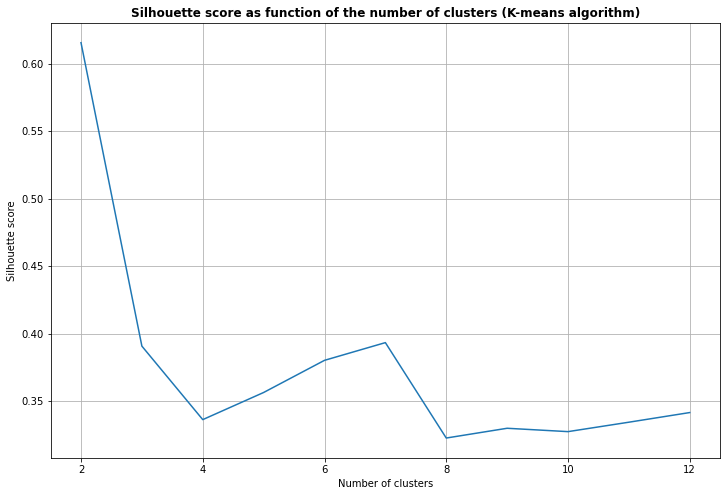

In [28]:
fig = plt.figure(figsize=(12, 8))
plt.plot(k_range, sil_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

plt.title('Silhouette score as function of the number of clusters (K-means algorithm)', fontsize=12, fontweight='semibold')
plt.grid()
plt.show()

In [29]:
clusterer = KMeans(n_clusters=7, random_state=1)
cluster_kmeans7 = clusterer.fit_predict(X_rfm_plus)

#df_init = pd.read_csv(os.path.join(PATH, "df_by_client.csv"))
df_init['cluster_label_kmeans_rfm_plus_no_reduc'] = cluster_kmeans7

E:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:380: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(


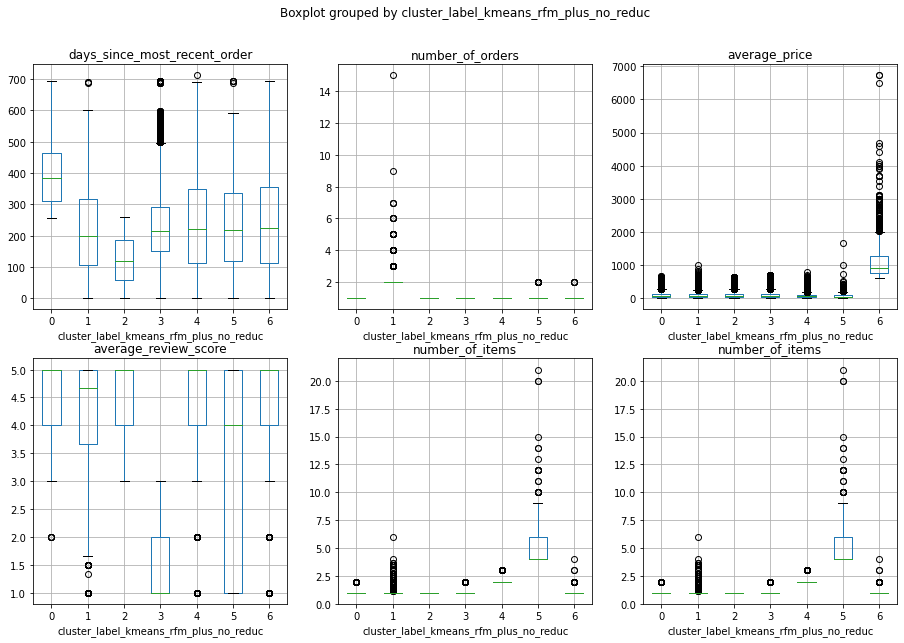

In [30]:
list_box = [
    'days_since_most_recent_order',
    'number_of_orders',
    'average_price',
    'average_review_score',
    'number_of_items',
    'number_of_items'
]
# plot a feature a second time because the program crashes if the number of plots is different than 
# the number specified in the "subplots" definition (3 rows x 2 columns -> need 6 plots)
fig, ax = plt.subplots(2, 3, figsize=(15, 10), sharey=False)

df_init.boxplot(list_box, 'cluster_label_kmeans_rfm_plus_no_reduc', ax)

plt.show()

## DBSCAN

In [31]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

clustering = DBSCAN(eps=.5, min_samples=100)
clustering.fit_predict(X_rfm_plus)
cluster_dbscan = clustering.fit_predict(X_rfm_plus)

silhouette = silhouette_score(X_rfm_plus, cluster_dbscan)

print(silhouette)

0.1395578905292225


#### The main difference between the clusters seems to be the review_score

E:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:380: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(


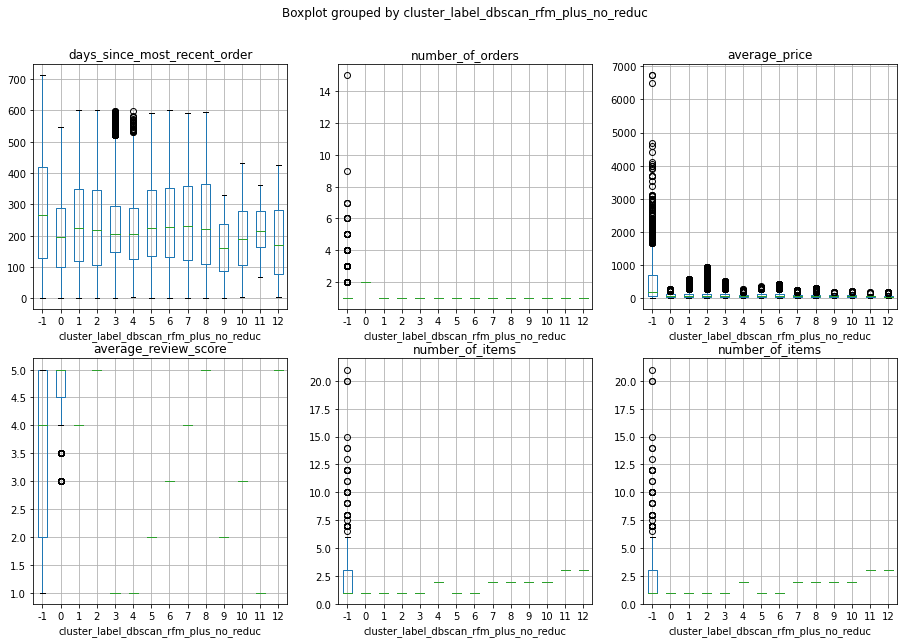

In [32]:
df_init['cluster_label_dbscan_rfm_plus_no_reduc'] = cluster_dbscan

fig, ax = plt.subplots(2, 3, figsize=(15, 10), sharey=False)

df_init.boxplot(list_box, 'cluster_label_dbscan_rfm_plus_no_reduc', ax)

plt.show()

# All features without dimensionality reduction

In [33]:
X = df.values
k_range = np.arange(2 ,16, 1)

In [34]:
df

,days_since_most_recent_order,number_of_orders,average_review_score,average_price,number_of_items,Cat_Other,Cat_alimentos,Cat_automotivo,Cat_bebes,Cat_beleza_saude,...,Cat_malas_acessorios,Cat_moveis_decoracao,Cat_moveis_escritorio,Cat_moveis_sala,Cat_papelaria,Cat_perfumaria,Cat_pet_shop,Cat_relogios_presentes,Cat_telefonia,Cat_utilidades_domesticas
0,0.612875,4.622656,0.271373,-0.489028,-0.264728,0.000000,0.0,0.000000,5.155278,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,2.991172
1,-1.320357,-0.159829,-0.120331,-0.037628,-0.264728,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,4.829584,0.000000,0.0,0.0,0.000000
2,-1.418657,-0.159829,0.663077,0.178599,-0.264728,0.000000,0.0,4.205564,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
3,0.304868,-0.159829,0.663077,-0.424423,-0.264728,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,5.994142,0.0,0.0,0.000000
4,-0.265271,-0.159829,0.663077,-0.556153,-0.264728,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,5.620917,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93353,1.969413,-0.159829,0.663077,-0.282720,-0.264728,0.000000,0.0,0.000000,0.000000,2.840913,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
93354,-0.219398,-0.159829,-0.120331,0.257323,-0.264728,0.000000,0.0,0.000000,5.155278,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
93355,0.848794,-0.159829,0.663077,0.420490,-0.264728,2.993379,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
93356,-0.029352,-0.159829,-1.687148,0.284036,1.632547,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000


## K-means

2
3
4
5
6
7
8
9
10
11
12
13
14
15


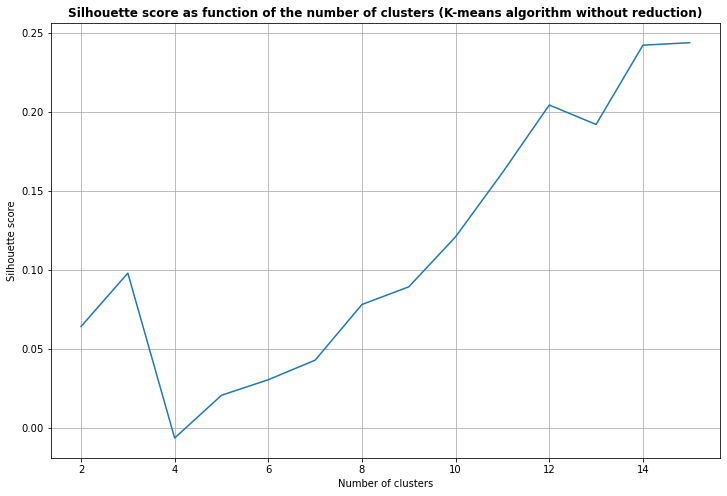

In [35]:
sil_scores = []
for n in k_range:
    print(n)
    clusterer = KMeans(n_clusters=n, random_state=1)
    cluster_kmeans = clusterer.fit_predict(X)
    
    silhouette = silhouette_score(X, cluster_kmeans)
    sil_scores.append(silhouette)

fig = plt.figure(figsize=(12, 8))

plt.plot(k_range, sil_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

plt.title('Silhouette score as function of the number of clusters (K-means algorithm without reduction)', fontsize=12, fontweight='semibold')
plt.grid()
plt.show()

In [36]:
clusterer = KMeans(n_clusters=3, random_state=1)
cluster_kmeans3 = clusterer.fit_predict(X)

In [37]:
df_init['cluster_label_kmeans_no_reduc'] = cluster_kmeans3

E:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:380: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(


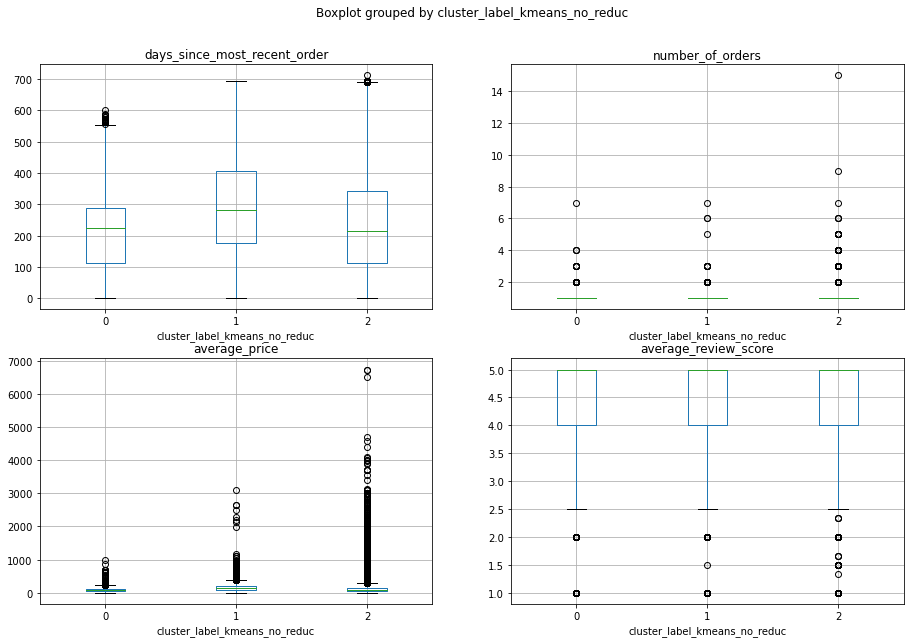

In [38]:
list_box = [
    'days_since_most_recent_order',
    'number_of_orders',
    'average_price',
    'average_review_score'
]

fig, ax = plt.subplots(2, 2, figsize=(15, 10), sharey=False)

df_init.boxplot(list_box, 'cluster_label_kmeans_no_reduc', ax)

plt.show()

## DBSCAN
#### Too many clusters

In [39]:
clustering = DBSCAN(eps=1, min_samples=100)
cluster_dbscan = clustering.fit_predict(X)

silhouette = silhouette_score(X, cluster_dbscan)


print("Silhouette score : ", silhouette)
n_clust = len(np.unique(cluster_dbscan)) - 1 if -1 in np.unique(cluster_dbscan) else len(np.unique(cluster_dbscan))
print("Number of clusters : ", n_clust)

Silhouette score :  0.46663829970361864
Number of clusters :  39


In [40]:
df_init['cluster_label_dbscan_no_reduc'] = cluster_dbscan

E:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:380: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(


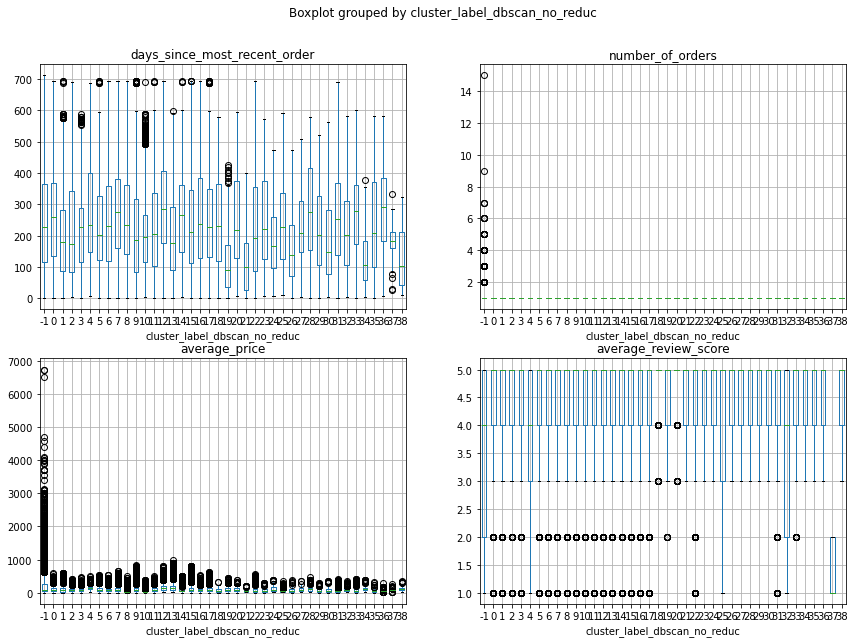

In [41]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10), sharey=False)

df_init.boxplot(list_box, 'cluster_label_dbscan_no_reduc', ax)

plt.show()

# All features with linear dimensionality reduction - PCA

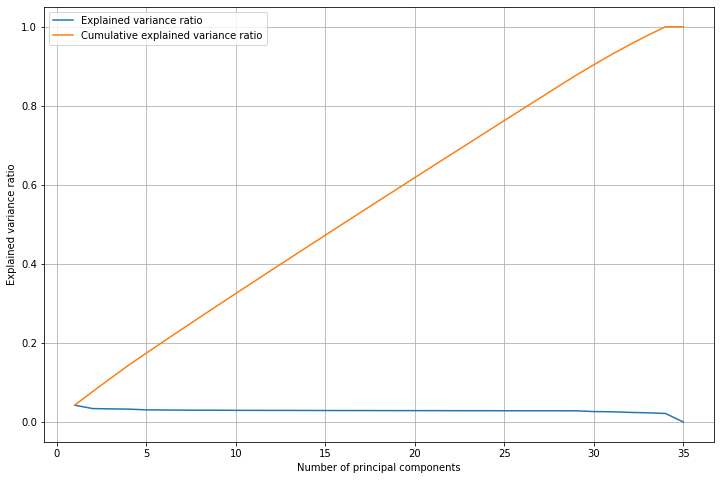

In [42]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

explained_var_ratio = pca.explained_variance_ratio_
cumulative = np.cumsum(explained_var_ratio)

fig = plt.figure(figsize=(12, 8))

plt.plot([i for i in np.arange(1, len(explained_var_ratio)+1)], [i for i in explained_var_ratio], label='Explained variance ratio')
plt.plot(np.arange(1, len(explained_var_ratio)+1), cumulative, label='Cumulative explained variance ratio')

plt.ylabel('Explained variance ratio')
plt.xlabel('Number of principal components')
plt.grid()
plt.legend()
plt.show()

In [43]:
pca = PCA(n_components=25)
pca.fit(X)
X_projected = pca.transform(X)

## K-means
#### No interesting (peak) silhouette score within a reasonable range of number of clusters

2
3
4
5
6
7
8
9
10
11
12
13
14
15


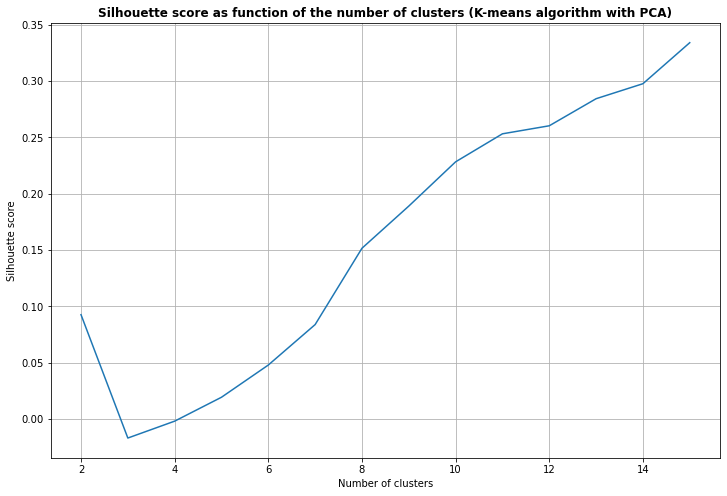

In [44]:
sil_scores = []
k_range = np.arange(2, 16, 1)
for n in k_range:
    print(n)
    clusterer = KMeans(n_clusters=n, random_state=1)
    cluster_kmeans = clusterer.fit_predict(X_projected)
    
    silhouette = silhouette_score(X_projected, cluster_kmeans)
    sil_scores.append(silhouette)

    
fig = plt.figure(figsize=(12, 8))

plt.plot(k_range, sil_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

plt.title('Silhouette score as function of the number of clusters (K-means algorithm with PCA)', fontsize=12, fontweight='semibold')
plt.grid()
plt.show()

# All features with non linear dimensionality reduction - tSNE

In [45]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=40, n_iter=300)
X_tsne = tsne.fit_transform(X)

2
3
4
5
6
7
8
9
10
11
12
13
14
15


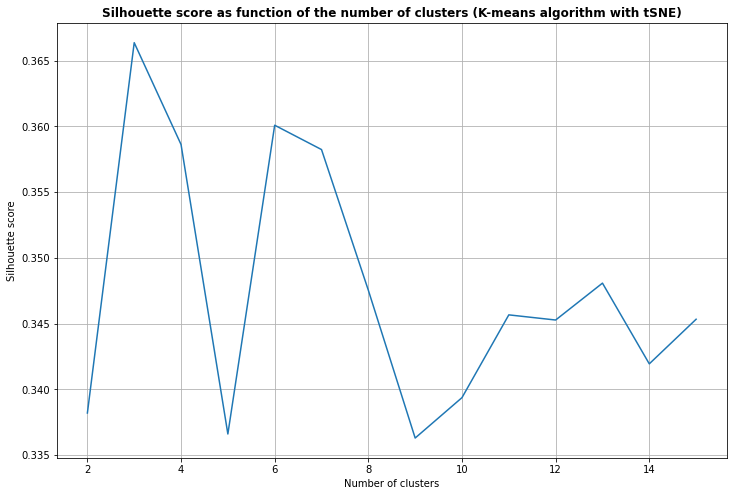

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_scores = []
k_range = np.arange(2, 16, 1)
for n in k_range:
    print(n)
    clusterer = KMeans(n_clusters=n, random_state=1)
    cluster_kmeans = clusterer.fit_predict(X_tsne)
    
    silhouette = silhouette_score(X_tsne, cluster_kmeans)
    sil_scores.append(silhouette)

    
fig = plt.figure(figsize=(12, 8))

plt.plot(k_range, sil_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

plt.title('Silhouette score as function of the number of clusters (K-means algorithm with tSNE)', fontsize=12, fontweight='semibold')
plt.grid()
plt.show()

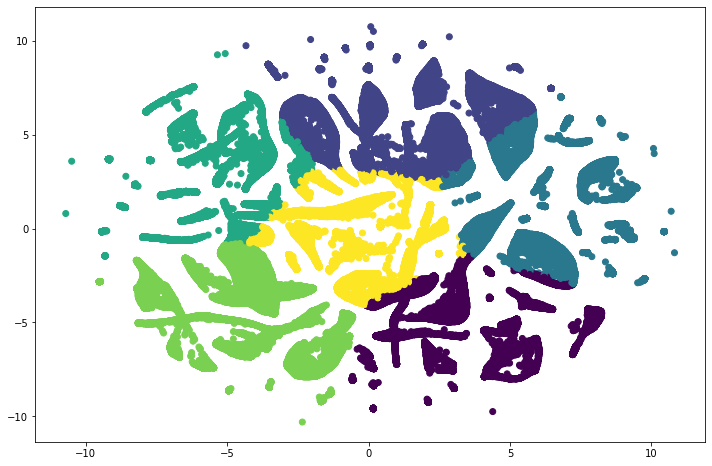

In [47]:
clusterer = KMeans(n_clusters=6, random_state=1)
cluster_kmeans = clusterer.fit_predict(X_tsne)

fig = plt.figure(figsize=(12, 8))

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_kmeans)
plt.show()

#### Clusters are also very similar and hard to interpret

E:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:380: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(


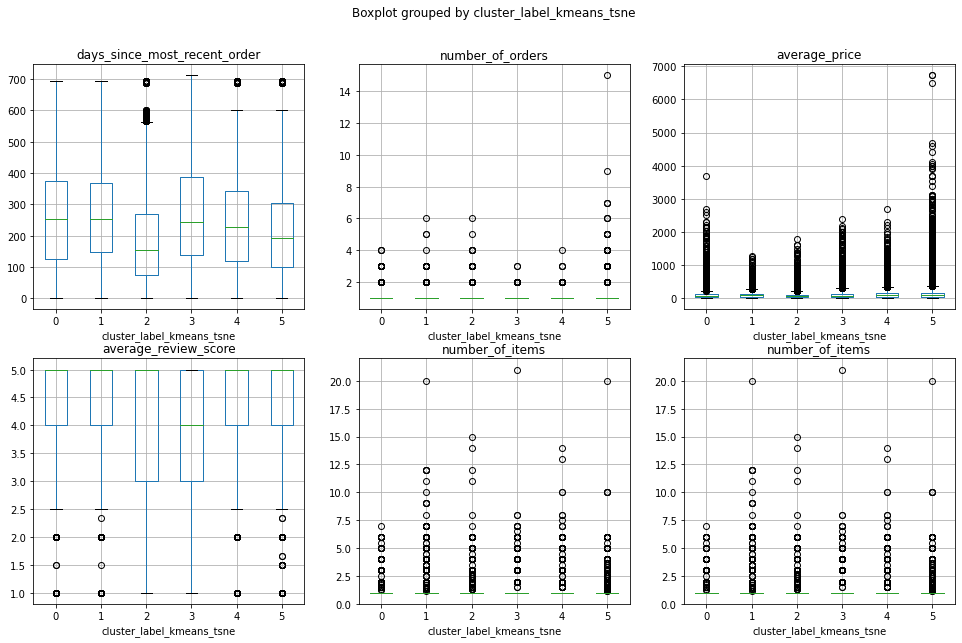

In [48]:
df_init['cluster_label_kmeans_tsne'] = cluster_kmeans

list_box = [
    'days_since_most_recent_order',
    'number_of_orders',
    'average_price',
    'average_review_score',
    'number_of_items',
    'number_of_items'
]

fig, ax = plt.subplots(2, 3, figsize=(16, 10), sharey=False)

df_init.boxplot(list_box, 'cluster_label_kmeans_tsne', ax)

plt.show()